___
# Atividade: Soma de variáveis aleatórias 
___

## Aula 17

**Preparo Prévio:**
1. Seção 5.1 – págs 137 a 140: aborda como fazer uma distribuição de probabilidade conjunta entre duas variáveis aleatórias X e Y e define função de probabilidade conjunta.
2. Seção 5.2 – págs 146 a 149; págs 156 e 157 (Exemplo 5.12) e págs 158 a 162 (Exemplo 5.13): aborda propriedades de esperança e variância em soma de variáveis aleatórias (X+Y). 

**Hoje:**
1. Descrever as propriedades de distribuição conjunta entre duas variáveis aleatórias discretas.
2. Compreender correlação entre variáveis aleatórias.
3. Descrever as propriedades de esperança e variância para soma de variáveis aleatórias (discretas e contínuas).


**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 7.3 (págs 234 a 240).
___

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


___
## <font color='blue'>Exercício 1 - Exemplo 3 da Aula 17 </font>

Num determinado momento em um certo país, a taxa de juros ($X$) pode variar 0,25 pontos percentuais (pp), para cima ou para baixo, ou manter-se constante. 
Já a taxa de câmbio ($Y$) pode variar para mais ou para menos em 1 pp, ou manter-se constante.
A tabela seguinte reflete as distribuições marginais e conjunta dessas duas taxas representadas, aqui, por $X$ e $Y$. 

![Tabela](XeY.png)

Um investidor aplica a mesma quantia num fundo que acompanha a variação da taxa de juros ($X$) e num fundo que acompanha a variação cambial ($Y$). Ao final do dia ele resgatará seu investimento.
1. Encontre a $E(X)$, $Var(X)$, $E(Y)$, $Var(Y)$, $Cov(X,Y)$ e $Corr(X,Y)$.
2. Construa a distribuição de probabilidades do ganho (em variação %) desse investidor, ou seja, encontre todos os valores de $G=0.5*X+0.5*Y$, sendo $G$ o ganho do investidor aplicando metade do dinheiro em $X$ e metade do dinheiro em $Y$. 
3. Calcule esperança e variância de $G$ utilizando a distribuição de probabilidade, ou seja, $E(G)$ e $Var(G)$.
4. Calcule esperança e variância de $G$ utilizando propriedades de esperança e variância da soma de variáveis aleatórias.


In [2]:
#Valores da tabela
y=[-1,0,1] #colunas
x=[-0.25,0,0.25] #linhas
probXY=[[[] for i in range(3)] for i in range(3)]
pxy=[0.05,0.07,0.26,0.075,0.21,0.12,0.125,0.07,0.02]
k=0
for i in range(3):
    for j in range(3):
        probXY[i][j]=pxy[k]
        k+=1
print(probXY)

[[0.05, 0.07, 0.26], [0.075, 0.21, 0.12], [0.125, 0.07, 0.02]]


In [3]:
#item 1 
#Distribuição de X
probX=[0,0,0]
for i in range(3):
    for j in range(3):
        probX[i]+=probXY[i][j]
for i in range(3):
    print("Probabilidade de X=",x[i]," é igual a ", probX[i])

espX=0
varX=0
for i in range(3):
    espX+=x[i]*probX[i]
for i in range(3):
    varX+=(x[i]-espX)**2*probX[i]
print("Esperança de X=",espX)
print("Variância de X=",varX)


Probabilidade de X= -0.25  é igual a  0.38
Probabilidade de X= 0  é igual a  0.40499999999999997
Probabilidade de X= 0.25  é igual a  0.215
Esperança de X= -0.04125
Variância de X= 0.0354859375


In [4]:
#item 1 
#Distribuição de Y
probY=[0,0,0]
for i in range(3):
    for j in range(3):
        probY[j]+=probXY[i][j]
for i in range(3):
    print("Probabilidade de Y=",y[i]," é igual a ", probY[i])

espY=0
varY=0
for i in range(3):
    espY+=y[i]*probY[i]
for i in range(3):
    varY+=(y[i]-espY)**2*probY[i]
print("Esperança de Y=",espY)
print("Variância de Y=",varY)


Probabilidade de Y= -1  é igual a  0.25
Probabilidade de Y= 0  é igual a  0.35000000000000003
Probabilidade de Y= 1  é igual a  0.4
Esperança de Y= 0.15000000000000002
Variância de Y= 0.6275


In [5]:
#item 1
#Covariância e Correlação
cov=0
for i in range(3):
    for j in range(3):
        cov+=(x[i]-espX)*(y[j]-espY)*probXY[i][j]

corr=cov/(varX*varY)**(0.5)
print("Covariância entre X e Y=", cov)
print("Correlação entre X e Y=", corr)


Covariância entre X e Y= -0.07256249999999999
Correlação entre X e Y= -0.4862697238590869


In [6]:
#item 2
#Distribuição do G=0.5*X +0.5*Y
g=[]
probG=[]
for i in range(3):
    for j in range(3):
        a = 0.5*x[i]+0.5*y[j]
        if a in g:
            probG[g.index(a)] += probX[i][j]
        else:
            g.append(a)         
            probG.append(probXY[i][j])

for i in range(len(g)):
    print("Probabilidade de G=",g[i]," é igual a ", probG[i])


Probabilidade de G= -0.625  é igual a  0.05
Probabilidade de G= -0.125  é igual a  0.07
Probabilidade de G= 0.375  é igual a  0.26
Probabilidade de G= -0.5  é igual a  0.075
Probabilidade de G= 0.0  é igual a  0.21
Probabilidade de G= 0.5  é igual a  0.12
Probabilidade de G= -0.375  é igual a  0.125
Probabilidade de G= 0.125  é igual a  0.07
Probabilidade de G= 0.625  é igual a  0.02


In [7]:
#item 3
#Esperança e variância de G
espG=0
varG=0
for i in range(len(g)):
    espG+=g[i]*probG[i]
for i in range(len(g)):
    varG+=(g[i]-espG)**2*probG[i]

print("Esperança e variância de G usando distribuição de probabilidade de G:")
print("Esperança de G=",espG)
print("Variância de G=",varG)

Esperança e variância de G usando distribuição de probabilidade de G:
Esperança de G= 0.05437500000000001
Variância de G= 0.12946523437500002


In [8]:
#item 4
#Esperança e variância de G usando propriedades de soma de variáveis aleatórias

#G=0.5X + 0.5Y
#G=0.5*(X+Y)

espGp = 0.5*(espX+espY)
varGp = 0.5**2*(varX+varY+2*cov)

print("Esperança e variância de G usando propriedades:")
print("Esperança de G=",espGp)
print("Variância de G=",varGp)


Esperança e variância de G usando propriedades:
Esperança de G= 0.05437500000000001
Variância de G= 0.129465234375


___
## <font color='blue'>Exercício 2 - Soma de normais correlacionadas</font>

Um pacote com mil peças de resistor de carbono 1/8w tem o preço distribuído como uma normal com média 21 reais e desvio padrão de 2 reais, ou seja, $X$~$N(21;4)$.

Já jumpers/fios macho-fêmea com 40 unidades de 20 cm tem o preço distribuído como uma normal com média 18,90 reais e desvio padrão de 1,50 reais, ou seja, $Y$~$N(18,90;2,25)$.

Assuma que a correlação entre esses dois preços seja de 0,85.

1. Simule $n=100$, $n=1.000$ e $n=10.000$ de cada variáveis aleatória respeitando a correlação entre elas. Para tanto, consulte o comando `np.random.multivariate_normal(mean, cov, n)`. 
2. Se você vai passear na Santa Efigênia para comprar um pacote de cada um, calcule a esperança e a variância do gasto $G=X+Y$ com a compra de uma pacotinho de resistores e um jumper nas especificações acima descritos. 
3. Calcule esperança e variância de $G$ utilizando propriedades de esperança e variância da soma de variáveis aleatórias.
4. Construa a distribuição do gasto e verifique se o gasto se assemelha a distribuição normal.
5. Repita assumindo correlação igual a zero entre X e Y.


In [43]:
#Informações do enunciado
muX = 21
varX = 4
muY = 18.90
varY = 2.25
corXY = 0.85
covXY = corXY*(varX*varY)**(0.5)
mean = [muX, muY]
cov = [[varX, covXY], [covXY, varY]]  # diagonal covariance

In [50]:
#item 1
n=100
x, y = np.random.multivariate_normal(mean, cov, n).T

print("Matriz de covariâncias a partir dos 100 valores correlacionados:")
print(np.cov(x,y))
print()

n=1000
x2, y2 = np.random.multivariate_normal(mean, cov, n).T

print("Matriz de covariâncias a partir dos 1000 valores correlacionados:")
print(np.cov(x2,y2))
print()

n=10000
x3, y3 = np.random.multivariate_normal(mean, cov, n).T

print("Matriz de covariâncias a partir dos 10000 valores correlacionados:")
print(np.cov(x3,y3))



Matriz de covariâncias a partir dos 100 valores correlacionados:
[[ 4.89181509  2.93039205]
 [ 2.93039205  2.31185857]]

Matriz de covariâncias a partir dos 1000 valores correlacionados:
[[ 4.04921244  2.63541949]
 [ 2.63541949  2.36538071]]

Matriz de covariâncias a partir dos 10000 valores correlacionados:
[[ 3.96323352  2.53074949]
 [ 2.53074949  2.25245087]]


In [52]:
#item 2

gasto = []
for i in range(len(x)):
    gasto.append(x[i]+y[i])

gasto2 = []
for i in range(len(x2)):
    gasto2.append(x2[i]+y2[i])

gasto3 = []
for i in range(len(x3)):
    gasto3.append(x3[i]+y3[i])


print("Para n = 100 a média e a variancia serão", np.mean(gasto), np.var(gasto))
print("Para n = 1000 a média e a variancia serão", np.mean(gasto2), np.var(gasto2))
print("Para n = 10000 a média e a variancia serão", np.mean(gasto3), np.var(gasto3))

Para n = 100 a média e a variancia serão 40.1839032645 12.9338131925
Para n = 1000 a média e a variancia serão 39.8335530631 11.673746702
Para n = 10000 a média e a variancia serão 39.8910612531 11.2760556552


In [46]:
#item 3
muG = muX + muY
varG = varX + varY + 2*covXY

print("A esperança do gasto será de",muG,'e a variância será de',varG)


A esperança do gasto será de 39.9 e a variância será de 11.35


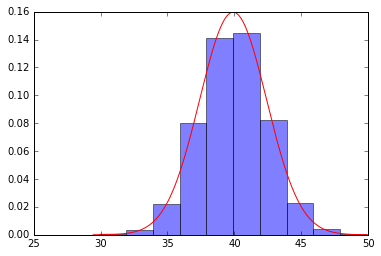

In [65]:
#item 4
G = stats.norm.rvs(loc=muG, scale=varG**(1/2), size=10000, random_state=None)
plt.hist(G, normed=1,  alpha=0.5)


x=np.linspace(29.45,49.85,10000)

reta= stats.norm.pdf(x,loc=muG, scale=varG**(1/2))
plt.plot(x,reta,'r')

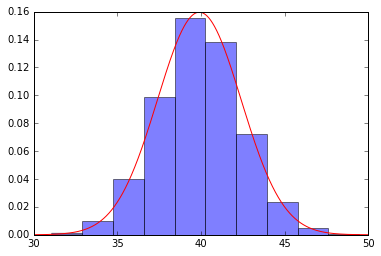

In [60]:
#item 5

corXY = 0
covXY = corXY*(varX*varY)**(0.5)
varG = varX + varY + 2*covXY

G = stats.norm.rvs(loc=muG, scale=varG**(1/2), size=10000, random_state=None)
plt.hist(G, normed=1, alpha=0.5)

valoresRetaNormal = []
G.max()

x=np.linspace(30,50,10000)

reta= stats.norm.pdf(x,loc=muG, scale=varG**(1/2))
plt.plot(x,reta,'r')